In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

In [2]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [3]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')

In [4]:
lines = data.readlines()
len(lines)

7352

In [5]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [6]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [7]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [8]:
#pca = PCA(n_components=4)
#pca.fit(z)

In [9]:
#print(pca.explained_variance_ratio_)

In [10]:
#sample = pca.transform(z)
#sample[9]
scale=StandardScaler()
scale.fit(z)
sample=scale.transform(z)

**Elbow using Cosine distance**

In [11]:
cluster_seperation={}
K = range(2,10)
for k in K :
    cluster_seperation[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    #print("Centers = "+str(centers))
    #print("pdist = "+str(pdist(centers)))
    pair_dist=pdist(centers)
    avg_dist=pair_dist.sum()/len(pair_dist)
    print("Avg dist = "+str(avg_dist))
    cluster_seperation[k]=avg_dist
print("Clsuter seperation ="+str(cluster_seperation))

Avg dist = 31.36615652730815
Avg dist = 29.84812698422871
Avg dist = 28.44243210279924
Avg dist = 31.96645445743697
Avg dist = 30.882503577450297
Avg dist = 31.6910438432274
Avg dist = 32.232963787546986
Avg dist = 32.15485719255049
Clsuter seperation ={2: 31.36615652730815, 3: 29.84812698422871, 4: 28.44243210279924, 5: 31.96645445743697, 6: 30.882503577450297, 7: 31.6910438432274, 8: 32.232963787546986, 9: 32.15485719255049}


In [12]:
SSE_array=[]
slope=[]
for key,value in cluster_seperation.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,8):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+2,s])
slope

[31.36615652730815, 29.84812698422871, 28.44243210279924, 31.96645445743697, 30.882503577450297, 31.6910438432274, 32.232963787546986, 32.15485719255049]


[[3, -1.5180295430794395],
 [4, -1.4056948814294685],
 [5, 3.5240223546377294],
 [6, -1.0839508799866735],
 [7, 0.8085402657771041],
 [8, 0.5419199443195843],
 [9, -0.0781065949964983]]

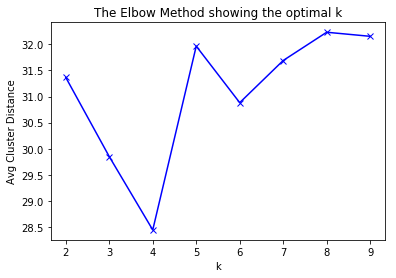

In [13]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('k')
plt.ylabel('Avg Cluster Distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 4
Optimal Number of Clusters = 6
Optimal Number of Clusters = 7
